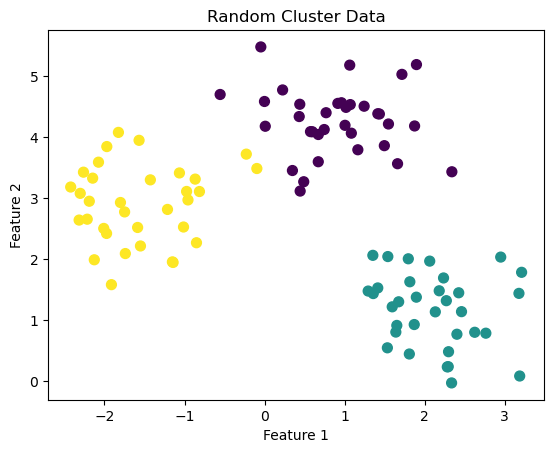

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# create random cluster data 2D array
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)
X = data[0] # features
y = data[1] # labels
# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Random Cluster Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [2]:
k = 3
#select the random first k points as initial centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

In [ ]:
def process(X, centroids, labels):
    for i in range(X.shape[0]):
        # calculate the distance from each point to each centroid
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        # assign the point to the nearest centroid
        labels[i] = np.argmin(distances)
    return labels
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # calculate the mean of the points assigned to each centroid
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids
def kmeans(X, k):
    labels = np.zeros(X.shape[0])
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    while True:
        # assign points to the nearest centroid
        labels = process(X, centroids, labels)
        # update the centroids
        new_centroids = update_centroids(X, labels, k)
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

In [ ]:
kmeans_centroids, kmeans_labels = kmeans(X, k)

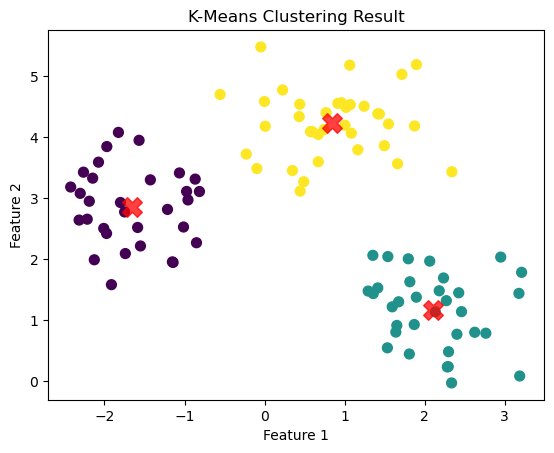

In [5]:
#visualize results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# module for K-Means clustering
%%writefile -a kmeans.py
import numpy as np

def process(X, centroids, labels):
    for i in range(X.shape[0]):
        # calculate the distance from each point to each centroid
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        # assign the point to the nearest centroid
        labels[i] = np.argmin(distances)
    return labels
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # calculate the mean of the points assigned to each centroid
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids
def kmeans(X, k):
    labels = np.zeros(X.shape[0])
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    while True:
        # assign points to the nearest centroid
        labels = process(X, centroids, labels)
        # update the centroids
        new_centroids = update_centroids(X, labels, k)
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

if __name__ == "__main__":
    print("This is a module for K-Means clustering.")

Writing kmeans.py
